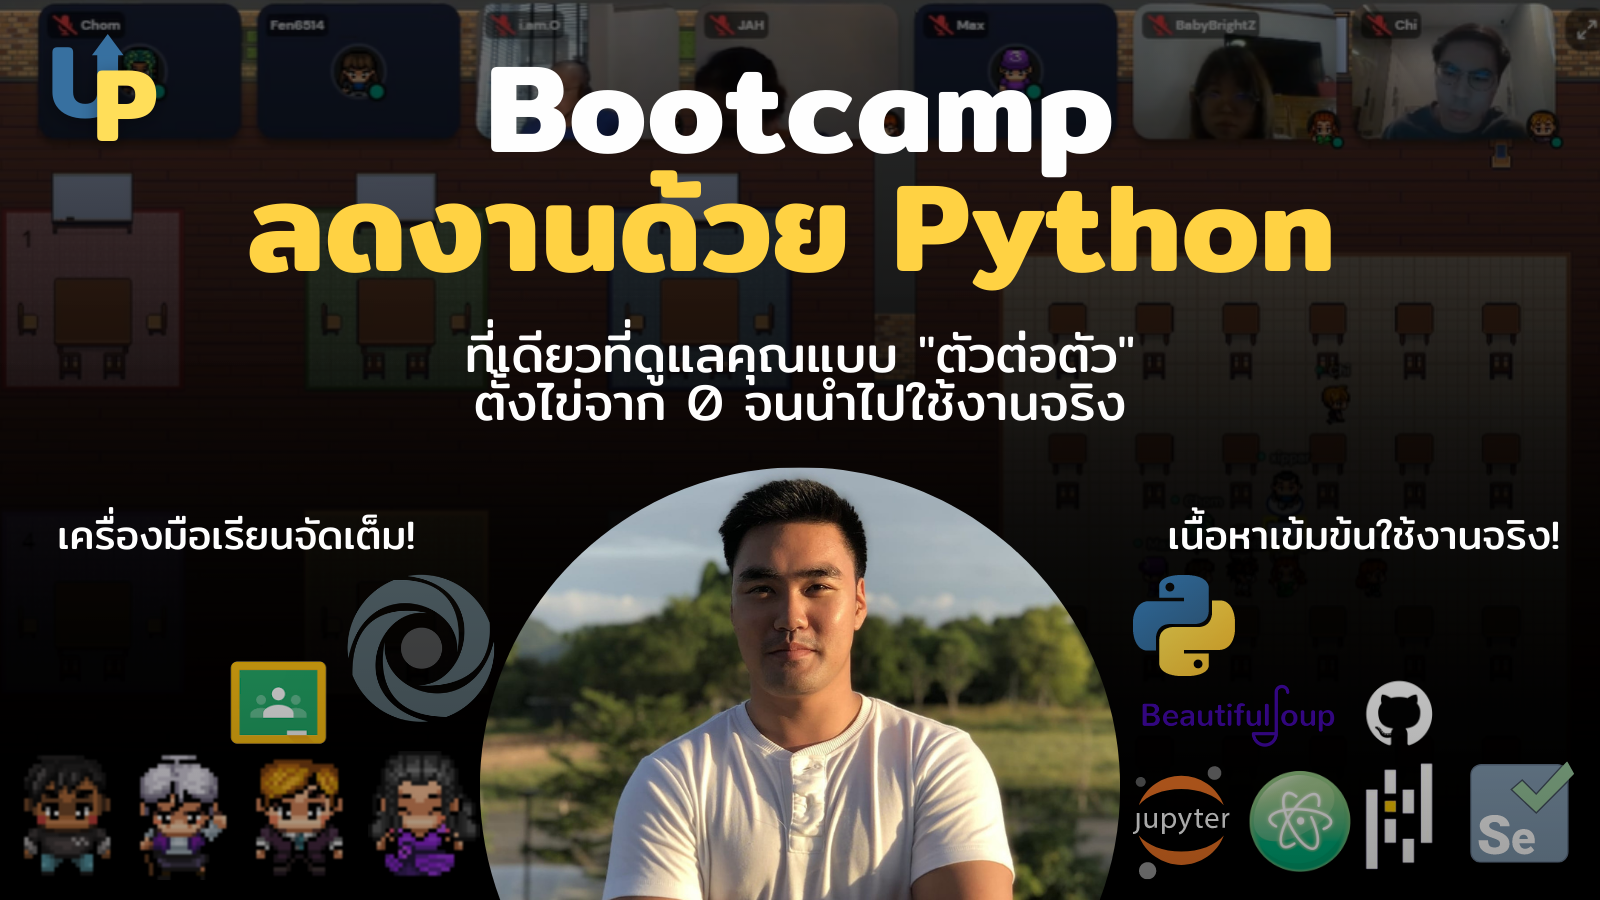

### Bootcamp ปูพื้นฐาน Python จาก 0 ที่เดียวที่ดูแลคุณ "ตัวต่อตัว" จนนำไปใช้งานจริง
[เรียนรู้เพิ่มเติมเกี่ยวกับ Bootcamp](https://www.ultimatepython.co/live)

## การทำงานกับ Google Sheet

เดี๋ยวนี้การใช้งานบน Excel ถูกย้ายขึ้นไปบน Google Sheet มากขึ้นเรื่อยๆ เพราะนอกจากจะเป็นโปรแกรมที่ทำให้เราจัดเก็บเอกสารที่เข้าถึงได้หลายคนพร้อมกัน ยังเชื่อมต่อกับบริการของ Google อื่นๆ ทำให้การใช้งานร่วมกับบริการอื่นๆ ง่ายทำได้โดยไร้รอยต่อเลยทีเดียว

วันนี้เราจะมาเรียนรู้วิธีการเชื่อมต่อกับ Google Sheet และการทำงานเบื้องต้นที่ช่วยคุณเริ่มต้นทำงานกับ Google Sheet ผ่านคำสั่งภาษา Python และสร้างออกมาเป็นระบอัตโนมัติได้ง่ายขึ้น!

## การยืนยันตัวตนด้วย OAuth 2.0

จะใช้การเข้าไปสร้าง Credentials เอาไว้บน Google Cloud Platform ก่อน และนำข้อมูลที่สร้างเอาไว้เป็นข้อมูลเพื่อใช้ยืนยันตัวตนในการทำงานกับบริการของ Google ต่างๆ ซึ่งวันนี้เราจะเข้าไปทำงานกับ Google Dirve ซึ่งเป็นที่อยู่ของไฟล์ และ Google Sheet ที่เราจะเข้าไปดึงข้อมูลมา

เมื่อสร้าง Credentials เสร็จเราจะใช้ไฟล์ที่เก็บข้อมูลนี้ที่อยู่ในรูป .json มาใช้ยืนยันตัวตนกับทาง Google โดยจะต้องบันทึกไว้ในชื่อ credentials-sheets.json (เท่านั้น) และเก็บไว้ในโฟลเดอร์เดียวกับไฟล์ Jupyter Notebook นี้

## เครื่องมือที่ต้องใช้

#### ติดตั้งเครื่องมือ

ezsheets library ที่ทำให้การทำงานกับ Google Sheet ง่ายในไม่กี่คำสั่ง

In [2]:
!pip install ezsheets

  Using cached EZSheets-2020.10.10-py3-none-any.whl


#### นำเข้ามาใช้

import ตัว library มาใช้

In [3]:
import ezsheets

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=128880635873-238ugdcrt0ckdqbna9haure819l3ekiu.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets&state=v81XBQBvWOkruiqNnwdBAshRgtNvSD&access_type=offline
Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=128880635873-238ugdcrt0ckdqbna9haure819l3ekiu.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=BOXjqJPxNa4qxGBUQr4jjqa6w4zXvD&access_type=offline


## การทำงานกับ Google Sheet

Google Sheet มีการบันทึกไฟล์อยู่หลายประเภท สำหรับ ezsheets จะเป็น library ที่ทำงานกับ spreadsheet เท่านั้น สังเกตได้จากไอคอนของ spreadsheet จะเป็นรูปคล้ายๆ เครื่องหมายบวกสีเขียว ขณะที่ถ้าเป็นไฟล์ Excel หรือนามสกุลไฟล์ .xlsx จะมีสัญลักษณ์เป็นตัว x สีเขียว

## อัพ Excel ขึ้นเป็น spreadsheet

ในการอัพโหลดไฟล์ Excel จะใช้คำสั่ง ezsheets.upload() ที่รับค่าที่อยู่ไฟล์ที่ต้องการอัพโหลดขึ้นเป็น spreadsheet ซึ่ง sheet ที่ได้จะได้เป็นชื่อที่เก็บไว้ใน string ที่ใช้ระบุที่อยู่ไฟล์

In [4]:
ezsheets.upload('Condo list.xlsx')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=128880635873-238ugdcrt0ckdqbna9haure819l3ekiu.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=Za1RNfMBjPUGDywAQqWtKJbYsEKj7b&access_type=offline


Spreadsheet(spreadsheetId='1DDkWxbS7hIFMDFIzy6bS5xt14rl35NIevSr9ZnlyNdU')

## การเปิด spreadsheet

สำหรับการดึงข้อมูลมาทำงานด้วยจะใช้คำสั่ง ezsheets.Spreadsheet() โดยการเปิดชีทที่ต้องการจะใช้ sheetId หรือ ชื่อชีทเป็นตัวระบุชีทที่ต้องการ ซึ่งสามารถดู sheetId ได้จาก url ของ spreadsheet นั้นๆ ส่วนของ id จะอยู่ระหว่าง /d/ และ / ตัวถัดไป ซึ่งผลลัพธ์จะได้ข้อมูลประเภท spreadsheet มา

In [7]:
sheet = ezsheets.Spreadsheet('1DDkWxbS7hIFMDFIzy6bS5xt14rl35NIevSr9ZnlyNdU')

### การเปลี่ยชื่อ spreadsheet

spreadsheet จะถูกสร้างจาก string ที่เป็น path file มาตั้งเป็นชื่อของ spreadsheet ซึ่งสามารถเปลี่ยนชื่อได้ในภายหลังโดยการใช้คำสั่ง .title และกำหนดด้วย =

In [9]:
sheet.title = 'Top 10 Condo'

## list ของ spreadsheet ที่เข้าถึงได้

เราสามารถดู sheet ที่เข้าถึงได้จากคำสั่ง ezsheets.listSpreadsheets() ที่จะได้ข้อมูลเป็น dictionary ที่ประกอบด้วย sheetid เป็น key ของข้อมูล และเก็บชื่อของชีทเอาไว้เป็น value ของ key

In [10]:
ezsheets.listSpreadsheets()

{'1DDkWxbS7hIFMDFIzy6bS5xt14rl35NIevSr9ZnlyNdU': 'Top 10 Condo',
 '19yTqjWP7YHeYe-BBDNjd7aSsZiRMn4afI4ZCITrl9nU': 'North',
 '1swGyKKJIohccBBWGDVEEDzUvQtTNWLxviHWMAdmhJ5Y': 'condo list',
 '1-Y5USmY0-ViapWu4HIEFTbyS0tKjSS27emJxv8QSbx0': 'Invoice',
 '1SZQlIP2UOH_NxTojtt-aK_WzbbG4QBF7djWSIY2JPFs': 'MKT Target'}

## ชีททั้งหมดใน spreaadsheet

สามารถดูชีททั้งหมดที่อยู่ใน spreadsheet ด้วยคำสั่ง .sheets ที่จะได้ข้อมูลเป็น tuple ที่เก็บ object ประเภท sheet เอาไว้ ซึ่งเราสามารถดูข้อมูลเบื้องต้นเกี่ยวกับ sheet ได้จากข้อมูล sheet เช่น ชื่อชีท จำนวนแถว จำนวนคอลัมน์

In [12]:
sheet.sheets

(<Sheet sheetId=80852289, title='Sheet1', rowCount=1000, columnCount=26>,)

## เปิดชีทใน spreadsheet

ใช้ [ ] ดึงชีทที่ต้องการโดยการระบุชื่อ เป็น string ที่เขียนตามหลัง spreadsheet ที่เก็บ sheet นั้นๆ เอาไว้ซึ่งเราจะได้ข้อมูลเป็น object ประเภท sheet มา

#### ใช้การดึงชื่อชีทจาก spreadsheet

In [13]:
sheet['Sheet1']

<Sheet sheetId=80852289, title='Sheet1', rowCount=1000, columnCount=26>

#### ใช้การดึงตำแหน่งชีทจาก .sheets

In [28]:
s = sheet.sheets[0]

## ข้อมูลจากชีท

เมื่อได้ชีทมา เราจะดึงข้อมูลอีกรอบให้ได้ข้อมูลที่อยู่ในตารางที่เราสามารถนำมาแก้ไข นำไปใช้งานได้ โดยมีวิธีการดึงหลักๆ คือ ดึง cell ที่ต้องการ ดึง column ที่ต้องการ หรือ ดึง row ที่ต้องการ

### ข้อมูล Cell

สามารถดึงข้อมูลใน cell จากชีทด้วยการใช้สัญลักษณ์ [ ] และระบุ cell ที่ต้องการ

In [20]:
s['B2']

'ดิ ออริจิ้น สุขุมวิท-สายลวด อี 22 สเตชั่น (The Origin Sukhumvit-Sailuat E22 Station)'

### ข้อมูล Column

สามารถดึงออกจากชีทได้ด้วยคำสั่ง .getColumn() ที่จะรับชื่อ หรือตำแหน่งของ column ซึ่งใน library นี้ตำแหน่งแรกจะเริ่มต้นที่ 1 หรือ column A นั่นเอง

In [32]:
s.getColumn(2)

['name',
 'ดิ ออริจิ้น สุขุมวิท-สายลวด อี 22 สเตชั่น (The Origin Sukhumvit-Sailuat E22 Station)',
 'เดอะ เบส อีส-บางแค (THE BASE Ease-Bangkhae)',
 'ไซมิส พระราม 9 (Siamese Rama 9)',
 'ลุมพินี วิลล์ จรัญ-ไฟฉาย (Lumpini Ville Charan-Fai Chai)',
 'ลุมพินี วิลล์ แจ้งวัฒนะ - ปากเกร็ด สเตชั่น (Lumpini Ville Chaengwatthana-Pakkret Station)',
 'พลัม คอนโด สะพานใหม่ สเตชั่น (Plum Condo Saphanmai Station)',
 'ธนา แอสทรา สาทร - จันทน์ (Thana Astra Sathorn - Chan)',
 'ดิ อีส เซร่า (The Ease Sierra)',
 'เดโลนิกซ์ คอนโด เอแบค-บางนา (Delonix Condo Abac - Bangna)',
 'ไลฟ์ ราชปรารภ (Life Ratchaprarop)',
 'เบลส เรสซิเดนซ์ เอกมัย (Bless Residence Ekkamai)',
 'เคฟ ทาวน์ สเปซ (Kave Town Space)',
 'เคฟทาวน์ ชิฟท์ (Kave Town Shift)',
 'ชาโตว์ อินทาวน์ รัชโยธิน (Chateau In Town Ratchayothin)',
 'โมดิซ ศรีราชา (Modiz Sriracha)',
 'โมดิซ ไรห์ม คลาวด์ (Modiz Rhyme Cloud)',
 'เคฟ เอวา (Kave Ava)',
 'เดอะ มูฟ ราม 22 (The Muve Ram 22)',
 'เดอะ มูฟ บางนา (The Muve Bangna)',
 'เดอะ มูฟ เกษตร (The Muve Kaset)']

### ข้อมูล Row

สามารถดึงออกจากชีทได้ด้วยคำสั่ง .getRow() ที่ตำแหน่งของ row ซึ่งใน library นี้ตำแหน่งแรกจะเริ่มต้นที่ 1 นั่นเอง

In [31]:
s.getRow(2)

['0',
 'ดิ ออริจิ้น สุขุมวิท-สายลวด อี 22 สเตชั่น (The Origin Sukhumvit-Sailuat E22 Station)']

### การอัพเดทข้อมูล

เมื่อมีการเปลี่ยนแปลง เราจะใช้คำสั่ง .refresh() เพื่อดึงข้อมูลที่อัพเดทให้กับข้อมูลที่ดึงมา

In [30]:
s.refresh()

## การแก้ไขข้อมูล / เพิ่มข้อมูล

การแก้ไขข้อมูล หรือ เพิ่มข้อมูลใน Column, Row นั้นใช้วิธีเดียวกัน แต่จะมีความแตกต่างที่การแก้ไขข้อมูลใช้การระบุ Column, Row ที่มีอยู่แล้วในลักษณะของการระบุข้อมูลเพื่อนำไปบันทึกทับข้อมูลเดิม แต่สำหรับการเพิ่มข้อมูลนั้นใช้การระบุ Column, Row ที่ยังไม่มีข้อมูลอยู่ ทำให้เกิดการสร้าง Column, Row ใหม่

### • การการแก้ไข Cell

In [34]:
s['B1'] = 'Condo Name'

### • การการแก้ไข / เพิ่ม Column

ใช้คำสั่ง .updateColumn() ที่จะรับข้อมูล 2 ค่า นั่นคือ ตำแหน่งของ Column ที่ต้องการเปลี่ยนแปลง / เพิ่มเข้าไป และข้อมูลที่ต้องการบันทึกลงไปใน Column นั้น

ตัวอย่าง การใส่ Column ใหม่ที่ได้มาจากการคำนวนผลรวมของทุก Column

In [35]:
s.updateColumn('B',['Condo Name',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

### • การการแก้ไข / เพิ่ม Row

ใช้คำสั่ง .updateRow() ที่จะรับข้อมูล 2 ค่า นั่นคือ ตำแหน่งของ Row ที่ต้องการเปลี่ยนแปลง / เพิ่มเข้าไป และข้อมูลที่ต้องการบันทึกลงไปใน Row นั้น

In [36]:
s.updateRow(2,['A','B'])

## ถ้าชอบบทเรียนนี้ การกด subscribe และชวนเพื่อนมาเรียน จะช่วยเราได้มากอย่างที่คุณคิดไม่ถึงเลย :)

### [กดลิ้งค์นี้เพื่อ Subscribe](https://www.youtube.com/channel/UCqJqoqQJqhKNRPgaCtkON1w?sub_confirmation=1)

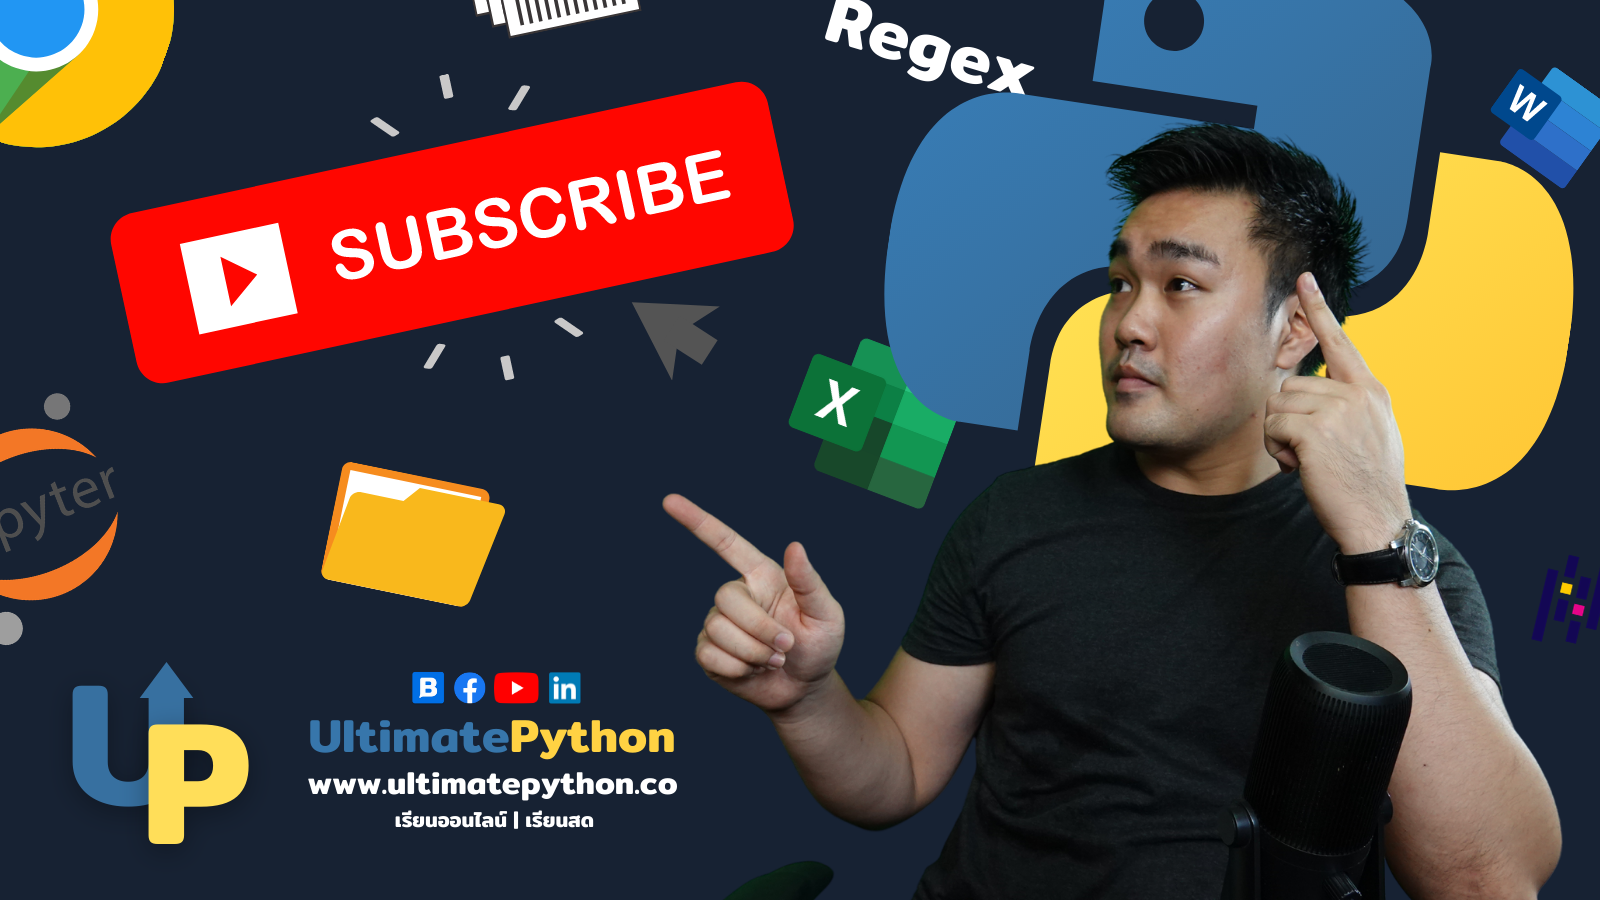